In [1]:

import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("Data/train.csv")
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
test_data = pd.read_csv("Data/test.csv")
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [4]:
(train_data.shape, test_data.shape)

((4250, 20), (750, 20))

In [5]:
## Traindataset
train_data.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [6]:
test_data.isna().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [7]:
churn = train_data['churn'].value_counts()
churn

no     3652
yes     598
Name: churn, dtype: int64

In [8]:
print("No ",churn[0]/(churn[0]+churn[1]))
print("Yes",churn[1]/(churn[0]+churn[1]))

No  0.8592941176470589
Yes 0.14070588235294118


# EDA

In [9]:
categ_columns = []
for col in train_data.columns:
    if train_data[col].nunique()<10:
        categ_columns.append(col) 
Num_cols = ['number_vmail_messages' ,'total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

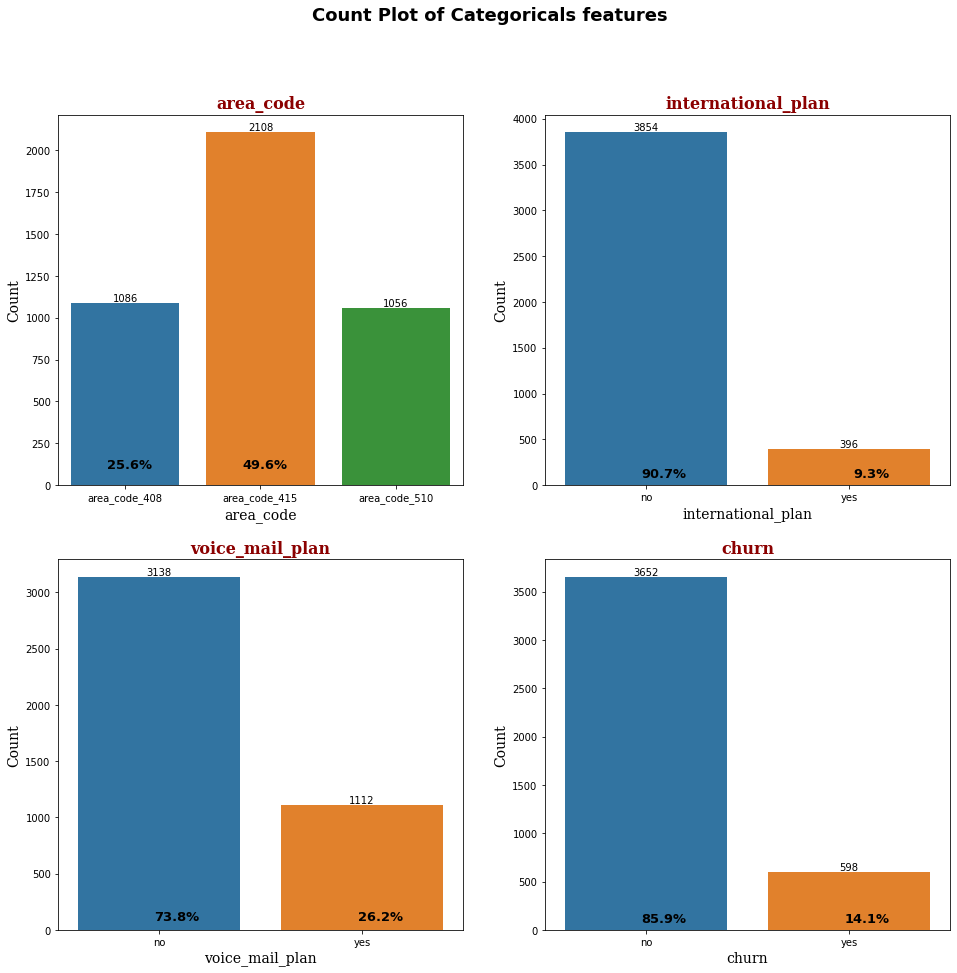

In [10]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Count Plot of Categoricals features', fontsize=18, fontweight='bold')
# fig.subplots_adjust(top=0.92);
# fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i , columns in enumerate(categ_columns):
    input = np.unique(train_data[columns] , return_counts = True)
#     print(input)
    col= 'input'
    ax1 = fig.add_subplot(2, 2, i+1);
    ax1 = sn.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]')))
    #The below two lines of codes are used for percentage values.
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13, fontdict={'weight': 'bold'})
    ax1.set_title(f'{columns}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{columns}', fontdict=axlab_dict)
    ax1.set_ylabel('Count', fontdict=axlab_dict)
    ax1.bar_label(ax1.containers[0])

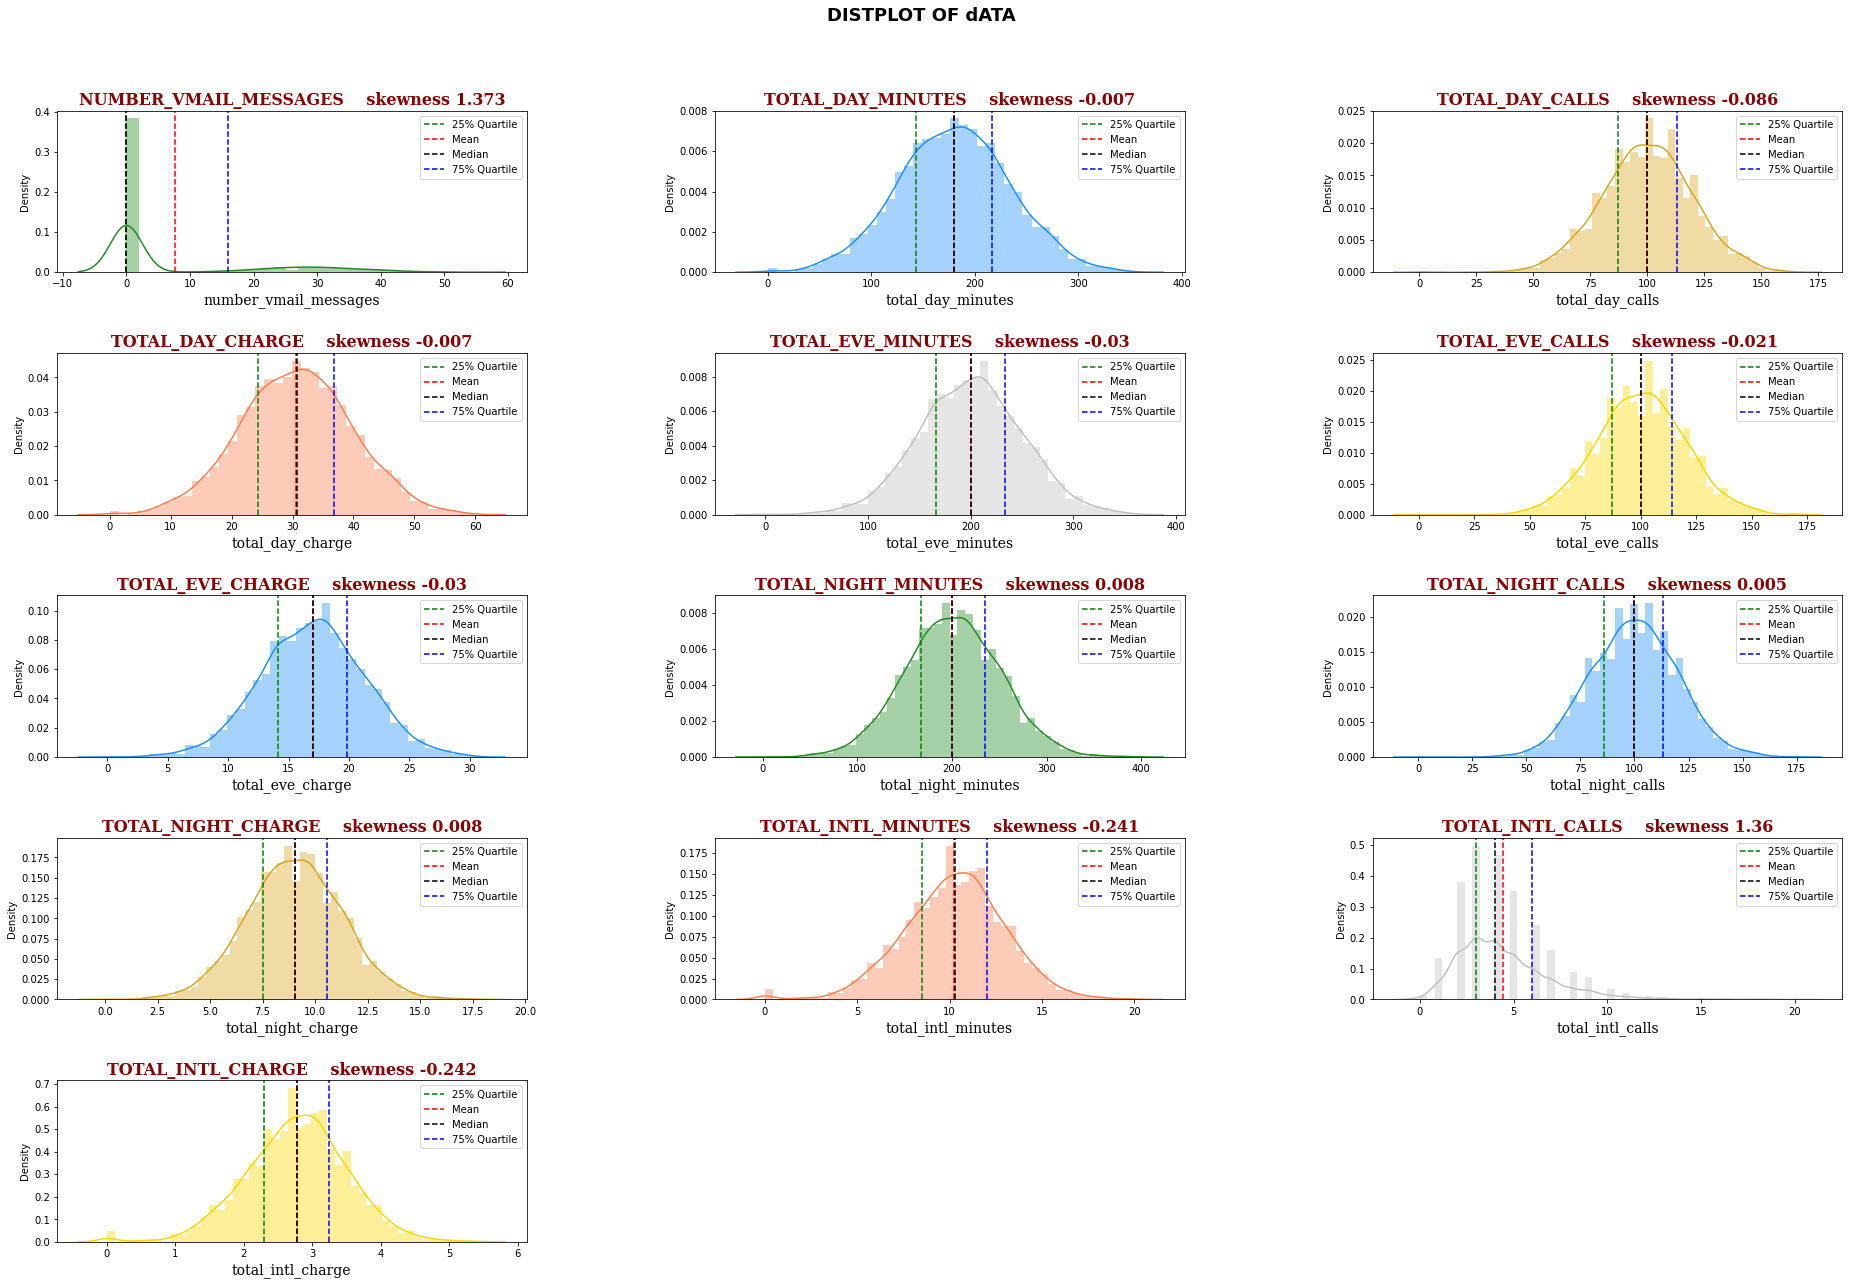

In [11]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' , 'dodgerblue' , 'forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ];

#create figure with 3 x 3 grid of subplots
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF dATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    ax = fig.add_subplot(6, 3, i+1)
    ax = sn.distplot(train_data[col],  color=colours[i]) 
    ax.axvline(train_data[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile')
    ax.axvline(train_data[col].mean(),color='red',linestyle='--',label='Mean')
    ax.axvline(train_data[col].median(),color='black',linestyle='--',label='Median')
    ax.axvline(train_data[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile')
    # ax.text('skewness: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}    skewness {round(train_data[col].skew(),3)}', fontdict=axtitle_dict)
    ax.legend(fontsize=10) 

In [12]:
train_data.state = pd.Categorical(train_data.state).codes
train_data.area_code = pd.Categorical(train_data.area_code).codes
train_data.international_plan = pd.Categorical(train_data.international_plan).codes
train_data.voice_mail_plan = pd.Categorical(train_data.voice_mail_plan).codes
train_data.churn = pd.Categorical(train_data.churn).codes
test_data.state = pd.Categorical(test_data.state).codes
test_data.area_code = pd.Categorical(test_data.area_code).codes
test_data.international_plan = pd.Categorical(test_data.international_plan).codes
test_data.voice_mail_plan = pd.Categorical(test_data.voice_mail_plan).codes
train_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [13]:
train_data['total_net_minutes'] = train_data['total_day_minutes'] + train_data['total_eve_minutes'] + train_data['total_night_minutes']
train_data['total_net_calls'] = train_data['total_day_calls'] + train_data['total_eve_calls'] + train_data['total_night_calls']
train_data['total_net_charge'] = train_data['total_day_charge'] + train_data['total_eve_charge'] + train_data['total_night_charge']


train_data.drop(columns= ['state', 'area_code'], inplace= True)
train_data.drop(columns=['account_length', 'total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)
train_data

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,0,10.3,6,2.78,0,0,645.8,237,62.35
4246,0,0,0,11.5,6,3.11,3,0,495.3,260,49.77
4247,0,0,0,6.9,7,1.86,1,0,492.9,331,51.24
4248,0,1,40,9.9,5,2.67,2,0,756.2,369,72.42


In [14]:
test_data['total_net_minutes'] = test_data['total_day_minutes'] + test_data['total_eve_minutes'] + test_data['total_night_minutes']
test_data['total_net_calls'] = test_data['total_day_calls'] + test_data['total_eve_calls'] + test_data['total_night_calls']
test_data['total_net_charge'] = test_data['total_day_charge'] + test_data['total_eve_charge'] + test_data['total_night_charge']


test_data.drop(columns= ['state', 'area_code'], inplace= True)
test_data.drop(columns=['account_length', 'total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)
test_data

,id,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,1,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,2,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,3,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,4,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,5,0,0,0,15.5,5,4.19,3,652.1,303,55.96
...,...,...,...,...,...,...,...,...,...,...,...
745,746,0,0,0,11.3,7,3.05,0,548.4,307,48.66
746,747,0,0,0,12.3,2,3.32,3,689.5,314,63.99
747,748,0,0,0,14.7,2,3.97,3,654.6,276,62.75
748,749,0,0,0,13.6,4,3.67,1,525.8,314,48.15


In [15]:
X_train = train_data.drop('churn',axis=1)
y_train = train_data.churn
X_test = test_data.drop('id',axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.number_vmail_messages = scaler.fit_transform(X_train.number_vmail_messages.values.reshape(-1,1))
X_train.total_intl_minutes = scaler.fit_transform(X_train.total_intl_minutes.values.reshape(-1,1))
X_train.total_intl_charge = scaler.fit_transform(X_train.total_intl_charge.values.reshape(-1,1))
X_train.total_net_minutes = scaler.fit_transform(X_train.total_net_minutes.values.reshape(-1,1))
X_train.total_net_calls = scaler.fit_transform(X_train.total_net_calls.values.reshape(-1,1))
X_train.total_net_charge = scaler.fit_transform(X_train.total_net_charge.values.reshape(-1,1))
X_train.total_intl_calls = scaler.fit_transform(X_train.total_intl_calls.values.reshape(-1,1))
X_train.number_customer_service_calls = scaler.fit_transform(X_train.number_customer_service_calls.values.reshape(-1,1))

X_test.number_vmail_messages = scaler.fit_transform(X_test.number_vmail_messages.values.reshape(-1,1))
X_test.total_intl_minutes = scaler.fit_transform(X_test.total_intl_minutes.values.reshape(-1,1))
X_test.total_intl_charge = scaler.fit_transform(X_test.total_intl_charge.values.reshape(-1,1))
X_test.total_net_minutes = scaler.fit_transform(X_test.total_net_minutes.values.reshape(-1,1))
X_test.total_net_calls = scaler.fit_transform(X_test.total_net_calls.values.reshape(-1,1))
X_test.total_net_charge = scaler.fit_transform(X_test.total_net_charge.values.reshape(-1,1))
X_test.total_intl_calls = scaler.fit_transform(X_test.total_intl_calls.values.reshape(-1,1))
X_test.number_customer_service_calls = scaler.fit_transform(X_test.number_customer_service_calls.values.reshape(-1,1))

In [21]:
X_train

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,0,1,1.366857,1.247901,-0.579164,1.248591,-0.426346,0.343852,0.845226,-0.110674
1,0,0,-0.567911,0.704379,0.232927,0.698342,-1.188960,-0.605331,0.816157,0.224178
2,1,0,-0.567911,-1.324770,1.045017,-1.328187,0.336268,-0.256284,-1.509350,0.806780
3,1,0,-0.567911,-0.056552,-0.579164,-0.053219,1.098882,-0.890199,1.630084,-0.708761
4,0,1,1.218029,-0.998657,1.045017,-0.992669,1.098882,2.233211,0.409193,1.896499
...,...,...,...,...,...,...,...,...,...,...
4245,0,0,-0.567911,0.015918,0.638972,0.013885,-1.188960,0.730056,-1.829107,0.548383
4246,0,0,-0.567911,0.450735,0.638972,0.456769,1.098882,-0.964512,-1.160524,-0.669082
4247,0,0,-0.567911,-1.216066,1.045017,-1.220821,-0.426346,-0.991535,0.903364,-0.526819
4248,0,1,2.408655,-0.129022,0.232927,-0.133743,0.336268,1.973115,2.007979,1.522937


In [22]:
X_test

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_net_minutes,total_net_calls,total_net_charge
0,0,1,1.172240,-0.106243,-0.613702,-0.106976,-0.497639,1.369617,-0.041312,1.536327
1,1,0,-0.599015,-1.442710,0.625821,-1.445297,-1.281734,0.713930,0.473065,0.865723
2,0,0,-0.599015,1.013500,0.625821,1.017213,1.854646,0.525958,-1.705472,-0.112683
3,0,0,-0.599015,-0.792537,-0.613702,-0.789520,1.070551,-0.495721,1.350532,-0.013299
4,0,0,-0.599015,1.880397,0.212647,1.887122,1.070551,0.760369,0.049461,-0.094350
...,...,...,...,...,...,...,...,...,...,...
745,0,0,-0.599015,0.363326,1.038996,0.361436,-1.281734,-0.386255,0.170491,-0.798726
746,0,0,-0.599015,0.724534,-1.026876,0.722782,1.070551,1.173906,0.382293,0.680463
747,0,0,-0.599015,1.591432,-1.026876,1.592691,1.070551,0.788012,-0.767491,0.560815
748,0,0,-0.599015,1.194103,-0.200527,1.191195,-0.497639,-0.636146,0.382293,-0.847935


In [23]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int8

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
sub = pd.read_csv('Data/test.csv')
sub=sub.iloc[:,0:1]
sub['churn']=y_pred
sub["churn"] = np.where(sub["churn"] == 1, "yes", "no")
sub["churn"].value_counts()

no     656
yes     94
Name: churn, dtype: int64

In [29]:
sub.to_csv(r'Data/submissions.csv',index=False)

In [30]:
# ACCURACY GIVEN BY KAGGLE WEBSITE is 96.761%